In [3]:
import glob
import numpy as np
import blimpy as bl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
%matplotlib inline

In [10]:
labels_list = np.load('/datax/scratch/benjb/hdbscan_labels_10_5.npz')['arr_0']

In [6]:
lfiles = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

filename = '/datax/scratch/benjb/m31_l_data/' + lfiles[0][44:-2] + 'dat'

df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

ctr_freqs = df0['Uncorrected_Frequency'].values

In [7]:
fb = bl.Waterfall(lfiles[0])

Plotting class -1 ...
Plotting class 0 ...
Plotting class 1 ...
Plotting class 2 ...
Plotting class 3 ...
Plotting class 4 ...
Plotting class 5 ...
Plotting class 6 ...
Plotting class 7 ...
Plotting class 8 ...
Plotting class 9 ...
Plotting class 10 ...
Plotting class 11 ...
Plotting class 12 ...


<Figure size 432x288 with 0 Axes>

<Figure size 720x5760 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x2952 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x3960 with 0 Axes>

<Figure size 720x144 with 0 Axes>

<Figure size 720x792 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x5760 with 0 Axes>

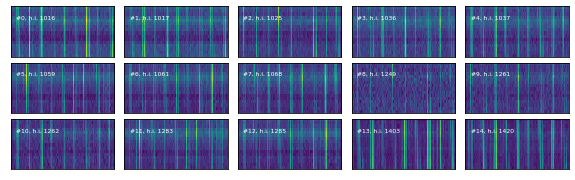

In [12]:
freqs, full_dynamic_spectrum = fb.grab_data()

for l in np.unique(labels_list):

    plt.clf()

    print(f'Plotting class {l} ...')

    class_idxs = np.where(labels_list == l)[0]

    n = np.min([len(class_idxs), 400])

    #shuffle_idxs = np.arange(len(ctr_freqs))
    #np.random.shuffle(shuffle_idxs)
    #ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

    fig, axs = plt.subplots(n//5, 5, figsize=(10, n//5))
    for i in range(n//5): # rows
        for j in range(5):     # columns
            dynamic_spectrum = full_dynamic_spectrum[:,
                                                    np.where((freqs < ctr_freqs[class_idxs[5*i+j]]+0.00135) & 
                                                            (freqs > ctr_freqs[class_idxs[5*i+j]]-0.00135))[0]
                                                            ]
            axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            axs[i][j].set_yticks([])
            axs[i][j].set_xticks([])
            axs[i][j].text(0.05, 0.75, f'#{5*i+j}, h.i. {class_idxs[5*i+j]}', size=6, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)

    #fig.suptitle(f'class {l} hits',  fontsize=12, y=0.9)
    plt.subplots_adjust(wspace=0.1, hspace=0.12)
    plt.savefig(f'/datax/scratch/benjb/class_{l}_hits.pdf', bbox_inches='tight')

In [5]:
noise_idxs = np.where(labels_list == -1)[0]
class_0_idxs = np.where(labels_list == 0)[0]
class_1_idxs = np.where(labels_list == 1)[0]
class_2_idxs = np.where(labels_list == 2)[0]
class_3_idxs = np.where(labels_list == 3)[0]
class_4_idxs = np.where(labels_list == 4)[0]
class_5_idxs = np.where(labels_list == 5)[0]

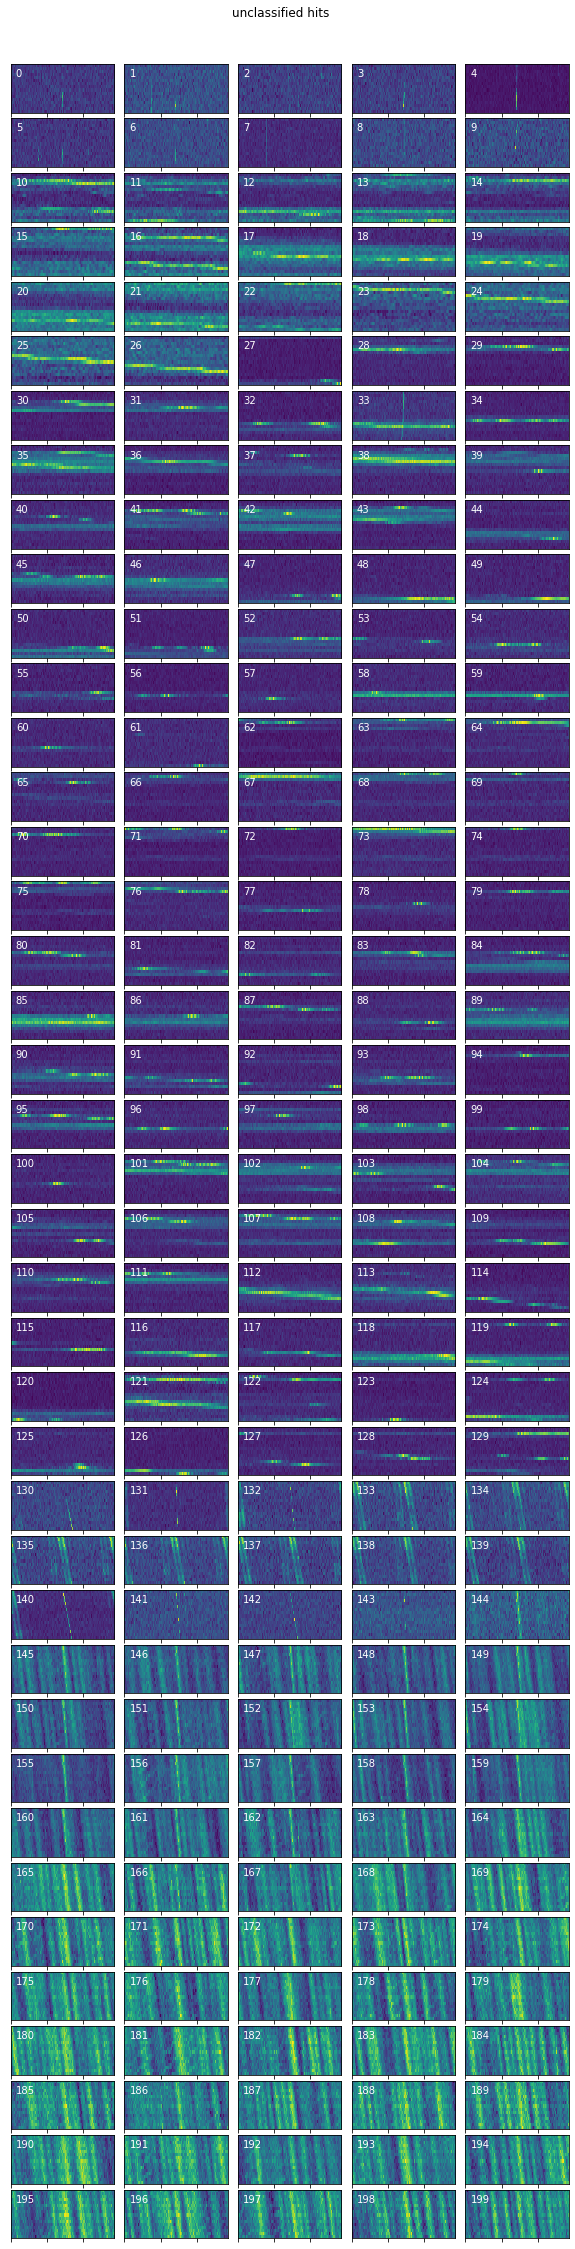

In [9]:
freqs, full_dynamic_spectrum = fb.grab_data()

n = np.min([len(noise_idxs), 200])

#shuffle_idxs = np.arange(len(ctr_freqs))
#np.random.shuffle(shuffle_idxs)
#ctr_freqs_shuffled = ctr_freqs[shuffle_idxs]

fig, axs = plt.subplots(n//5, 5, figsize=(10, n//5))
for i in range(n//5): # rows
    for j in range(5):     # columns
        dynamic_spectrum = full_dynamic_spectrum[:,
                                                 np.where((freqs < ctr_freqs[noise_idxs[5*i+j]]+0.00135) & 
                                                          (freqs > ctr_freqs[noise_idxs[5*i+j]]-0.00135))[0]
                                                          ]
        axs[i][j].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
        axs[i][j].set_xticklabels([])
        axs[i][j].set_yticklabels([])
        axs[i][j].set_yticks([])
        axs[i][j].set_xticks([])
        axs[i][j].text(0.05, 0.75, f'{5*i+j}', size=10, color='white', horizontalalignment='left', transform=axs[i][j].transAxes)

fig.suptitle('unclassified hits',  fontsize=12, y=0.9)
plt.subplots_adjust(wspace=0.1, hspace=0.12)
#plt.savefig('/datax/scratch/benjb/unclassified_hits.pdf', bbox_inches='tight')

#fb.plot_waterfall(f_start=ctr_freqs[class_3_idxs[idx]]-0.001, f_stop=ctr_freqs[class_3_idxs[idx]]+0.001, logged=True)

In [35]:
print(noise_idxs[25])
freqs, full_dynamic_spectrum = fb.grab_data()

47


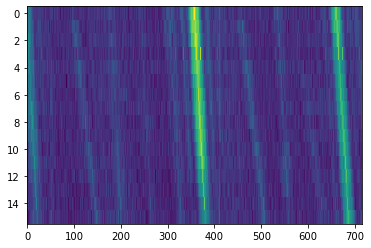

In [48]:
dynamic_spectrum = full_dynamic_spectrum[:,
                                                 np.where((freqs < ctr_freqs[501]+0.001) & 
                                                          (freqs > ctr_freqs[501]-0.001))[0]
                                                          ]

plt.imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
plt.show()

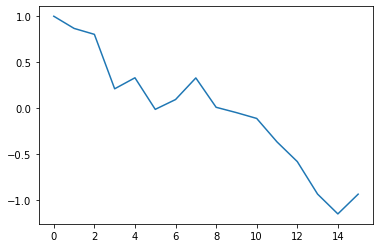

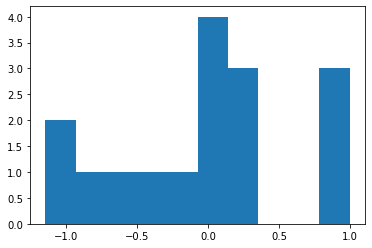

In [49]:
time_series = np.average(dynamic_spectrum, axis=1)
#time_series = np.log10(time_series)

normalized_time_series = (time_series-np.median(time_series))/np.max(time_series-np.median(time_series))

plt.plot(normalized_time_series)
plt.show()

plt.hist(normalized_time_series)
plt.show()

In [50]:
print(kurtosis(normalized_time_series[:], fisher=False))
print(skew(normalized_time_series))

2.203027534472344
-0.1478123515844345
